In [1]:
import numpy as np

In [2]:
from tracetools_analysis.ros_model import ApplicationFactory

In [3]:
trace_path = '~/.ros/tracing/e2e_demo2/ust'
architecture_path = '../architecture2.json'

In [4]:
app = ApplicationFactory.create_from_json(architecture_path)

In [5]:
app.import_trace(trace_path, start_transition_ms=1000, end_transition_ms=1000)

found converted file: /home/zs/.ros/tracing/e2e_demo2/ust/converted
 [99%] [Ros2Handler]


/home/zs/zs_ws/ga_ros2/colcon/build/tracetools_analysis/tracetools_analysis/ros_model/application.py:348: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  instances = pd.concat([start_instances, end_instances]).sort_values('timestamp')


In [6]:
# 所有节点
list(app.nodes)

In [7]:
# 打印节点名字
for node in app.nodes:
    print(node.name)

sub_dependency_node
timer_dependency_node


In [8]:
# 以该节点为起点的路径
paths =  app.nodes[0].paths

In [9]:
paths

In [10]:
# 打印所有路径
for path in paths:
    print(path.child_names)
    print("------")

SubDependencyNode::SubDependencyNode()::{lambda(std::unique_ptr<sensor_msgs::msg::Image>)#1}
------
SubDependencyNode::SubDependencyNode()::{lambda(std::unique_ptr<sensor_msgs::msg::Image>)#1}--SubDependencyNode::SubDependencyNode()::{lambda(std::unique_ptr<sensor_msgs::msg::Image>)#2}
------
SubDependencyNode::SubDependencyNode()::{lambda(std::unique_ptr<sensor_msgs::msg::Image>)#2}
------


In [11]:
key_path= paths[1]

In [12]:
key_path.name

'sub_dependency_node_4'

In [13]:
import matplotlib.pyplot as plt

In [14]:
def label(path):
    return 'max: {} ms, {}'.format(path.max_ms, path.name)

In [15]:
key_path.get_stats()

/home/zs/zs_ws/ga_ros2/colcon/build/tracetools_analysis/tracetools_analysis/ros_model/data_type.py:72: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  indicies = np.array(np.split(idx, idx_split))
/home/zs/zs_ws/ga_ros2/colcon/build/tracetools_analysis/tracetools_analysis/ros_model/data_type.py:75: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  hist = np.array([raw[_] for _ in indicies])


{'unit': 'ms',
 'max': 104.0,
 'min': 19.0,
 'median': 21.0,
 'mean': 52.82417582417584}

Text(0, 0.5, 'Probability')

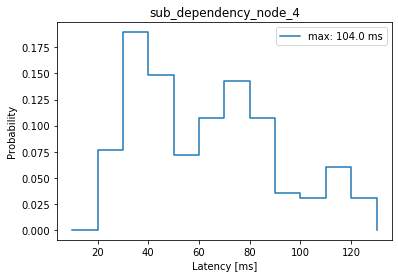

In [16]:
latency_ms, hist = key_path.hist(binsize_ns=10000000).get_xy()
max_ms = key_path.get_stats()['max']
plt.step(latency_ms, hist, label='max: {:.1f} ms'.format(max_ms), where='post')

plt.legend()
plt.title(key_path.name)
plt.xlabel('Latency [ms]')
plt.ylabel('Probability')

Text(0, 0.5, 'Latency [ms]')

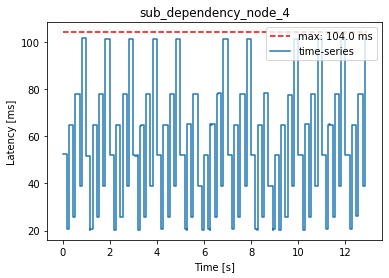

In [17]:
system_time_ns, latency_ns = key_path.timeseries.get_xy()

time_s = (system_time_ns - system_time_ns[0]) * 1.0e-9
latency_ms = latency_ns * 1.0e-6
max_ms = key_path.get_stats()['max']
plt.step(time_s[[0, -1]], [max_ms, max_ms], label='max: {:.1f} ms'.format(max_ms), c='r', ls='dashed')
plt.step(time_s, latency_ms, label='time-series', where='post')
    
plt.legend(loc='upper right')
plt.title(key_path.name)
plt.xlabel('Time [s]')
plt.ylabel('Latency [ms]')

In [18]:
key_path.child

In [19]:
key_path.child[0].name

'SubDependencyNode::SubDependencyNode()::{lambda(std::unique_ptr<sensor_msgs::msg::Image>)#1}'

In [20]:
callback = key_path.child[0]

In [21]:
callback.get_stats()

{'unit': 'ms',
 'min': 10.074852,
 'max': 10.238890999999999,
 'median': 10.1789655,
 'mean': 10.167110152777777,
 'send': 144,
 'lost': 0}

Text(0, 0.5, 'Probability')

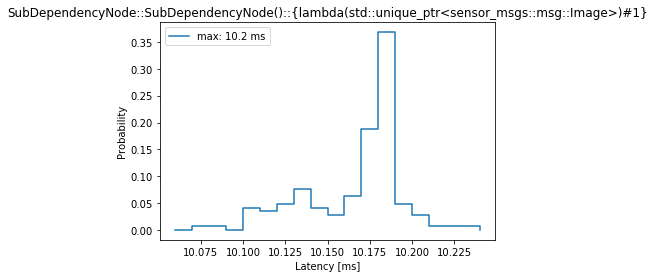

In [22]:
latency_ms, hist = callback.hist(binsize_ns=10000).get_xy()
max_ms = callback.get_stats()['max']
plt.step(latency_ms, hist, label='max: {:.1f} ms'.format(max_ms), where='post')

plt.legend()
plt.title(callback.name)
plt.xlabel('Latency [ms]')
plt.ylabel('Probability')

Text(0, 0.5, 'Latency [ms]')

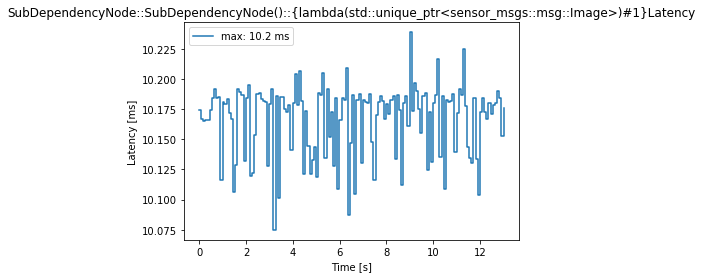

In [23]:
system_time_ns, duration_ns = callback.timeseries.get_xy()
time_s = (system_time_ns - system_time_ns[0]) * 1.0e-9
duration_ms = duration_ns * 1.0e-6

plt.title(callback.name + 'Latency')
plt.step(time_s, duration_ms, label='max: {:.1f} ms'.format(max_ms), where='post')
plt.legend()
plt.xlabel('Time [s]')
plt.ylabel('Latency [ms]')

In [24]:
sched = key_path.child[1]

In [25]:
key_path.child[1].name

'SubDependencyNode::SubDependencyNode()::{lambda(std::unique_ptr<sensor_msgs::msg::Image>)#1}--SubDependencyNode::SubDependencyNode()::{lambda(std::unique_ptr<sensor_msgs::msg::Image>)#2}'

In [26]:
sched.get_stats()

{'unit': 'ms',
 'min': 0.029637,
 'max': 81.11926299999999,
 'median': 31.41958,
 'mean': 32.24820482417582,
 'send': 91,
 'lost': 0}

Text(0, 0.5, 'Probability')

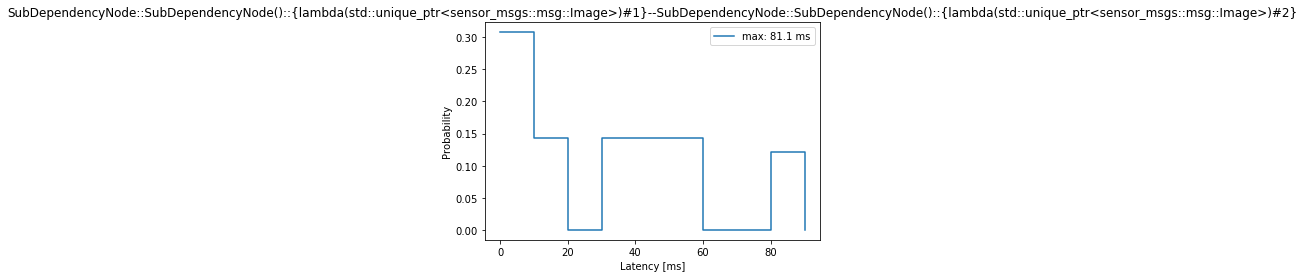

In [27]:
hist = sched.hist(binsize_ns=10000000)
latency_ms, hist = hist.get_xy()
max_ms = sched.get_stats()['max']
plt.step(latency_ms, hist, label='max: {:.1f} ms'.format(max_ms), where='post')

plt.legend()
plt.title(sched.name)
plt.xlabel('Latency [ms]')
plt.ylabel('Probability')

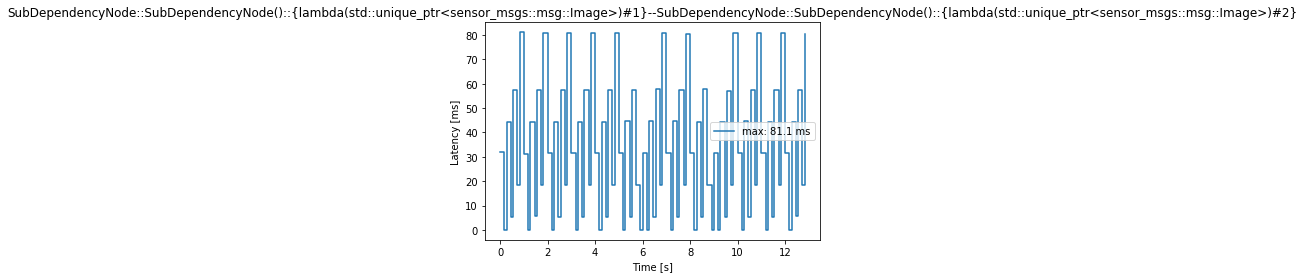

In [28]:
system_time_ns, latency_ns = sched.timeseries.get_xy()
time = (system_time_ns - system_time_ns[0]) * 1.0e-9
latency_ms = latency_ns * 1.0e-6
plt.step(time, latency_ms, label='max: {:.1f} ms'.format(max_ms), where='post')

plt.title(sched.name)
plt.xlabel('Time [s]')
plt.ylabel('Latency [ms]')
plt.legend()

In [29]:
callback1 = key_path.child[2]

In [30]:
callback1.get_stats()

{'unit': 'ms',
 'min': 10.096565,
 'max': 10.528718,
 'median': 10.254755999999999,
 'mean': 10.249154989130435,
 'send': 92,
 'lost': 0}

Text(0, 0.5, 'Probability')

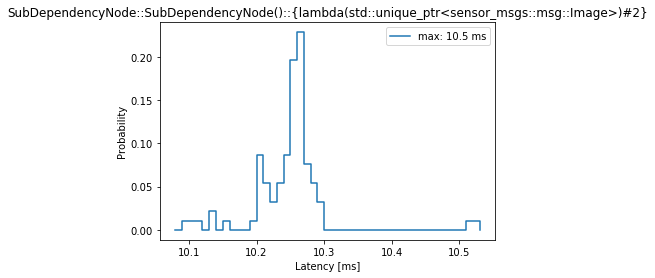

In [31]:
latency_ms, hist = callback1.hist(binsize_ns=10000).get_xy()
max_ms = callback1.get_stats()['max']
plt.step(latency_ms, hist, label='max: {:.1f} ms'.format(max_ms), where='post')

plt.legend()
plt.title(callback1.name)
plt.xlabel('Latency [ms]')
plt.ylabel('Probability')

Text(0, 0.5, 'Latency [ms]')

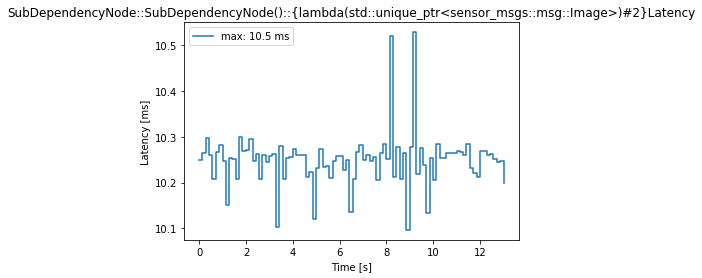

In [32]:
system_time_ns, duration_ns = callback1.timeseries.get_xy()
time_s = (system_time_ns - system_time_ns[0]) * 1.0e-9
duration_ms = duration_ns * 1.0e-6

plt.title(callback1.name + 'Latency')
plt.step(time_s, duration_ms, label='max: {:.1f} ms'.format(max_ms), where='post')
plt.legend()
plt.xlabel('Time [s]')
plt.ylabel('Latency [ms]')